In [1]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime

#read cleaned csv file
file_path = "Data/clean_data/clean_data.csv"
df = pd.read_csv(file_path)
df.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,07/06/2019,2355,N Hollywood,1591,99.0,Male,Unknown,STREET,GOODLAND AV,"(34.1371, -118.4062)"
1,07/06/2019,500,Foothill,1677,45.0,Male,White,STREET,GLENOAKS BL,"(34.2249, -118.3617)"
2,07/06/2019,1130,West Valley,1028,25.0,Male,Asian,STREET,SHERMAN WY,"(34.2012, -118.4989)"
3,07/06/2019,1415,Northeast,1153,29.0,Male,Unknown,STREET,LOS FELIZ BL,"(34.1081, -118.3078)"
4,07/06/2019,1230,Central,192,41.0,Male,Unknown,STREET,GRAND AV,"(34.0384, -118.2646)"


In [2]:
#create bins to extract hour from 'time'
bins = []
hour = []
for i in range (0,25):
    bins.append(99*i+i-1)
    hour.append(i)
hour.pop(-1)
df['hour'] = pd.cut(df['time'],bins,labels=hour)
df.hour.dropna()
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek
weekday_description = {0:'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday', 4:'Thursday', 5:'Friday',
                        6:'Saturday'}
df.weekday=df.weekday.map(weekday_description)


In [3]:
df.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location,hour,month,weekday
0,2019-07-06,2355,N Hollywood,1591,99.0,Male,Unknown,STREET,GOODLAND AV,"(34.1371, -118.4062)",23,7,Friday
1,2019-07-06,500,Foothill,1677,45.0,Male,White,STREET,GLENOAKS BL,"(34.2249, -118.3617)",5,7,Friday
2,2019-07-06,1130,West Valley,1028,25.0,Male,Asian,STREET,SHERMAN WY,"(34.2012, -118.4989)",11,7,Friday
3,2019-07-06,1415,Northeast,1153,29.0,Male,Unknown,STREET,LOS FELIZ BL,"(34.1081, -118.3078)",14,7,Friday
4,2019-07-06,1230,Central,192,41.0,Male,Unknown,STREET,GRAND AV,"(34.0384, -118.2646)",12,7,Friday


## Do Asian Crash More Than Average?

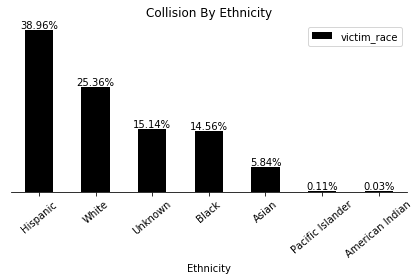

In [8]:
#get an overview of victim in race distribution
df['victim_race'].value_counts()
#bar graph
race_data = pd.DataFrame(df['victim_race'].value_counts())
fig = race_data.plot(kind='bar',color='black')
fig.set_xlabel('Ethnicity')
fig.set_yticks([])
fig.set_title('Collision By Ethnicity')
rects = fig.patches
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va=
              'bottom')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.tick_params(axis='x', rotation=40)
#export
plta.tight_layout()
plta.savefig(os.path.join("figures","collision_by_ethnicity.png"))

## Ethinicity Analysis

In [5]:
df1['victim_age'].mean()

NameError: name 'df1' is not defined

In [ ]:
df1 = df.copy()
meanage =df1.groupby(['victim_race']).mean()
meanage = meanage.drop(columns=['time','district'])
meanage

## How Many Car Accidents Per Month?

In [ ]:
df1= df.copy()
# #map the month column to make it look neat
month_description = ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
# df1.month = df.month.map(month_description)


month_data = pd.DataFrame(df1.month.value_counts())
month_data= month_data.sort_index()
fig_month = month_data.plot(kind='barh',color='black')


fig_month.set_ylabel('Month')
fig_month.set_yticklabels(month_description)
fig_month.set_xticks([])
fig_month.set_title('Collision Per Month')
fig_month.spines['right'].set_visible(False)
fig_month.spines['top'].set_visible(False)
fig_month.spines['bottom'].set_visible(False)
fig_month.tick_params(axis='x', rotation=40)
fig_month.get_legend().remove()


rects=fig_month.patches
labels = df1['month'].value_counts().sort_index()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig_month.text(rect.get_width()*1.01,rect.get_y(),label,ha='left',va=
              'bottom')

#export
plta.savefig(os.path.join("figures","collision_month_distribution.png"))

## Calendar Heatmap

## Google Heatmap

In [ ]:
# gmaps.configure(api_key=gkey)
# location = df[['lat','lon']].astype(float)
# fig = gmaps.figure()

# layer = gmaps.symbol_layer(
#     location, fill_color='rgba(0, 150, 0, 0.4)',
#     stroke_color='rgba(0, 0, 150, 0.4)', scale=2)

# fig.add_layer(layer)
# fig